In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
covid_groupby = pd.read_csv("0-covid_groupby.csv")
covid_groupby.drop("Unnamed: 0", axis=1, inplace=True)
covid_groupby

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
0,Asia,Afghanistan,18.6,2.581,1.337,96.082,3.918,63819.0,2751.0,4.310628,0.50,1803.987,0.511
1,Europe,Albania,38.0,13.188,8.643,78.169,21.831,132071.0,2436.0,1.844462,2.89,11803.431,0.795
2,Africa,Algeria,29.1,6.211,3.857,89.932,10.068,125693.0,3388.0,2.695456,1.90,13913.839,0.748
3,North America,Antigua and Barbuda,32.1,6.933,4.631,88.436,11.564,1251.0,42.0,3.357314,3.80,21490.943,0.778
4,South America,Argentina,31.9,11.198,7.441,81.361,18.639,3371508.0,71771.0,2.128751,5.00,18933.907,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,South America,Venezuela,29.0,6.614,3.915,89.471,10.529,217603.0,2428.0,1.115793,0.80,16745.022,0.711
151,Asia,Vietnam,32.6,7.150,4.718,88.132,11.868,4512.0,37.0,0.820035,2.60,6171.884,0.704
152,Asia,Yemen,20.3,2.922,1.583,95.495,4.505,6586.0,1297.0,19.693289,0.70,1479.147,0.470
153,Africa,Zambia,17.7,2.480,1.542,95.978,4.022,92520.0,1263.0,1.365110,2.00,3689.251,0.584


In [3]:
covid_groupby.groupby("continent").count()

,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
continent,,,,,,,,,,,,
Africa,39,39,39,39,39,39,39,39,39,39,39,39
Asia,42,42,42,42,42,42,42,42,42,42,42,42
Europe,39,39,39,39,39,39,39,39,39,39,39,39
North America,20,20,20,20,20,20,20,20,20,20,20,20
Oceania,3,3,3,3,3,3,3,3,3,3,3,3
South America,12,12,12,12,12,12,12,12,12,12,12,12


In [4]:
def cases_continent(continent):
    x = covid_groupby[covid_groupby["continent"] == continent ]
    return x

In [5]:
def sort_value(continent, value="deaths_ratio"):
    y = continent.sort_values(value, ascending=False)
    print(len(y.values))
    if len(y.values) > 3:
        x = y.head(5).append(y.tail(5))
        return x
    return y


In [6]:
africa = cases_continent("Africa")
asia = cases_continent("Asia")
europe = cases_continent("Europe")
north_america = cases_continent("North America")
oceania = cases_continent("Oceania")
south_america = cases_continent("South America")


In [7]:
s_gdp_africa = sort_value(africa)
s_gdp_asia = sort_value(asia)
s_gdp_europe = sort_value(europe)
s_gdp_north_america = sort_value(north_america)
s_gdp_south_america = sort_value(south_america)
s_gdp_oceania = sort_value(oceania)

39
42
39
20
12
3


In [8]:
gdp_mundo = pd.concat([s_gdp_africa, s_gdp_asia, s_gdp_europe, s_gdp_north_america, s_gdp_south_america, s_gdp_oceania], axis=0)
gdp_mundo_sorted = gdp_mundo.sort_values("deaths_ratio", ascending=False)
gdp_mundo_sorted.reset_index(inplace=True, drop=True)
gdp_mundo_sorted

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
0,Asia,Yemen,20.3,2.922,1.583,95.495,4.505,6586.0,1297.0,19.693289,0.700,1479.147,0.470
1,North America,Mexico,29.3,6.857,4.321,88.822,11.178,2385512.0,220746.0,9.253611,1.380,17336.469,0.779
2,Africa,Sudan,19.7,3.548,2.034,94.418,5.582,34889.0,2446.0,7.010806,0.800,4466.507,0.510
3,Africa,Egypt,25.3,5.159,2.891,91.950,8.050,248078.0,14441.0,5.821153,1.600,10550.206,0.707
4,South America,Ecuador,28.1,7.104,4.458,88.438,11.562,411466.0,19877.0,4.830776,1.500,10581.936,0.759
5,Asia,China,38.7,10.641,5.929,83.430,16.570,102784.0,4846.0,4.714742,4.340,15308.712,0.761
6,Europe,Bosnia and Herzegovina,42.5,16.569,10.711,72.720,27.280,202675.0,9070.0,4.475145,3.500,11713.895,0.780
7,Asia,Afghanistan,18.6,2.581,1.337,96.082,3.918,63819.0,2751.0,4.310628,0.500,1803.987,0.511
8,Europe,Bulgaria,44.7,20.801,13.272,65.927,34.073,415326.0,17379.0,4.184424,7.454,18563.307,0.816
9,Africa,Tanzania,17.7,3.108,1.874,95.018,4.982,509.0,21.0,4.125737,0.700,2683.304,0.529


<AxesSubplot:>

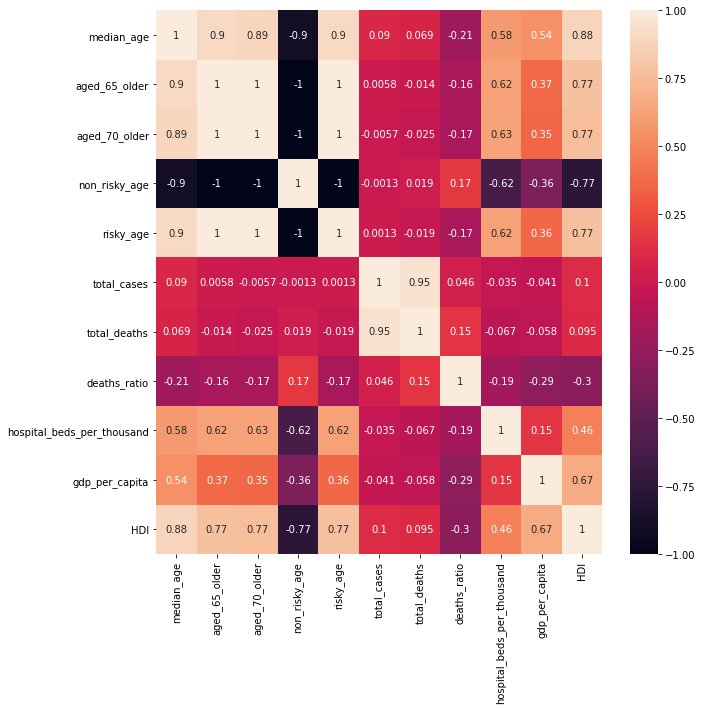

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(gdp_mundo_sorted.corr(), annot=True)

In [10]:
def subplot_bar(x1, x2, y, data):
    plt.figure(figsize=(20,40))
    plt.subplot(2,2,1) #filas, columnas, a cual de los dos lienzos quiero acceder
    sns.barplot(x=x1, y=y, data=data, color="b", alpha=0.6, label=x1).title.set_text('Sorted deaths_ratio of the world')
    plt.legend()

    plt.subplot(2,2,2) #filas, columnas, a cual de los dos lienzos quiero acceder
    sns.barplot(x=x2, y=y, data=data, color="m", alpha=0.6, label=x2).title.set_text('Second Plot')
    plt.legend()
    

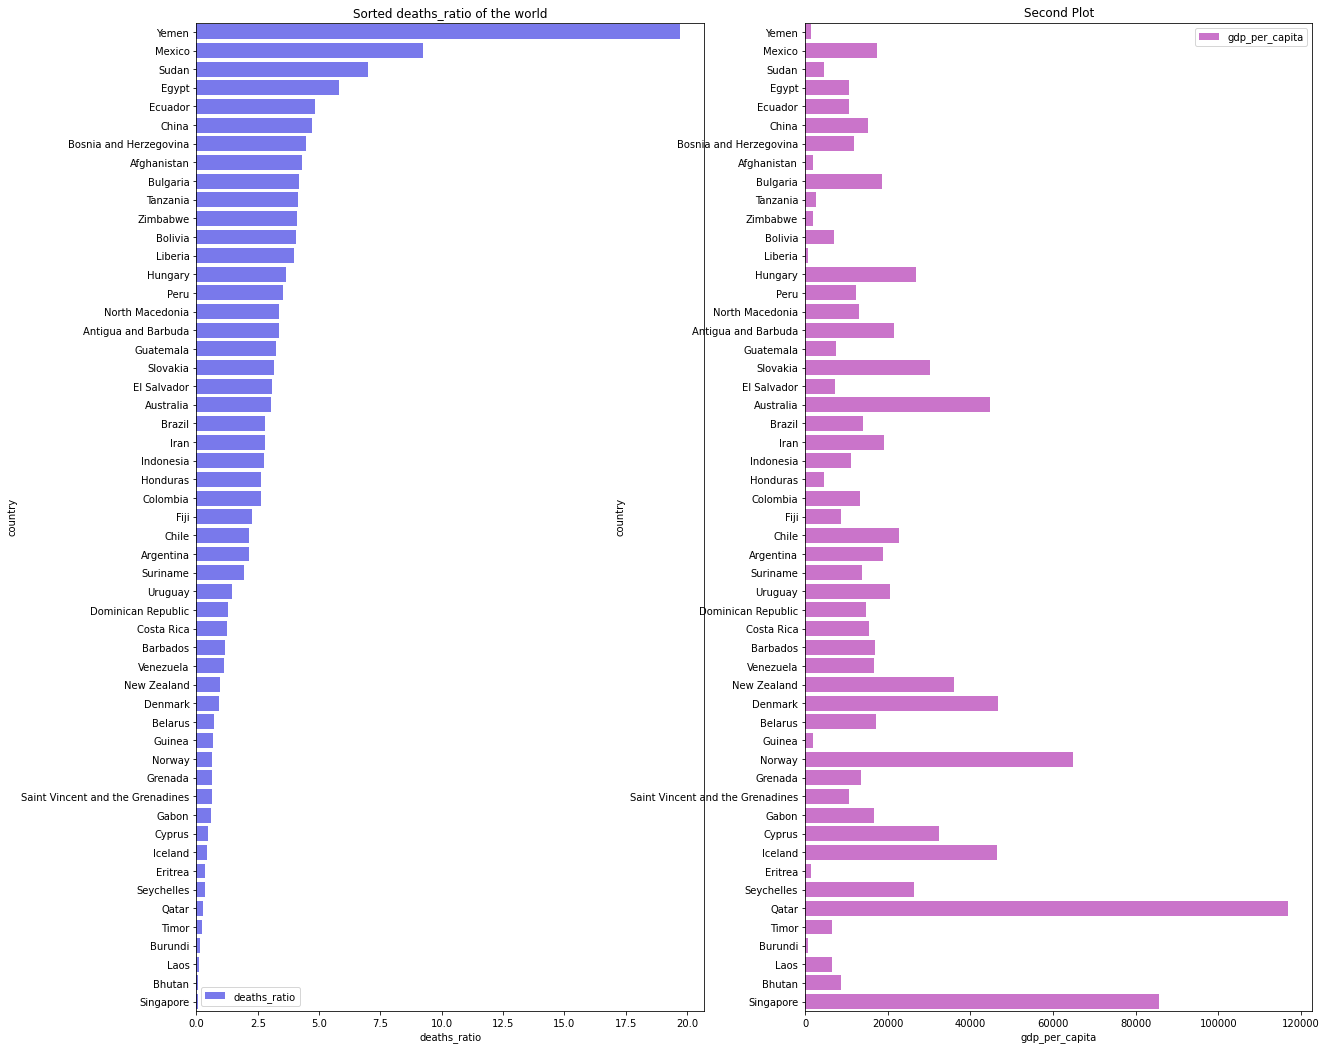

In [11]:
subplot_bar("deaths_ratio", "gdp_per_capita", "country", gdp_mundo_sorted)

In [12]:
gdp_mundo_sorted.head(25)

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
0,Asia,Yemen,20.3,2.922,1.583,95.495,4.505,6586.0,1297.0,19.693289,0.700,1479.147,0.470
1,North America,Mexico,29.3,6.857,4.321,88.822,11.178,2385512.0,220746.0,9.253611,1.380,17336.469,0.779
2,Africa,Sudan,19.7,3.548,2.034,94.418,5.582,34889.0,2446.0,7.010806,0.800,4466.507,0.510
3,Africa,Egypt,25.3,5.159,2.891,91.950,8.050,248078.0,14441.0,5.821153,1.600,10550.206,0.707
4,South America,Ecuador,28.1,7.104,4.458,88.438,11.562,411466.0,19877.0,4.830776,1.500,10581.936,0.759
5,Asia,China,38.7,10.641,5.929,83.430,16.570,102784.0,4846.0,4.714742,4.340,15308.712,0.761
6,Europe,Bosnia and Herzegovina,42.5,16.569,10.711,72.720,27.280,202675.0,9070.0,4.475145,3.500,11713.895,0.780
7,Asia,Afghanistan,18.6,2.581,1.337,96.082,3.918,63819.0,2751.0,4.310628,0.500,1803.987,0.511
8,Europe,Bulgaria,44.7,20.801,13.272,65.927,34.073,415326.0,17379.0,4.184424,7.454,18563.307,0.816
9,Africa,Tanzania,17.7,3.108,1.874,95.018,4.982,509.0,21.0,4.125737,0.700,2683.304,0.529


[Text(0.5, 0, '')]

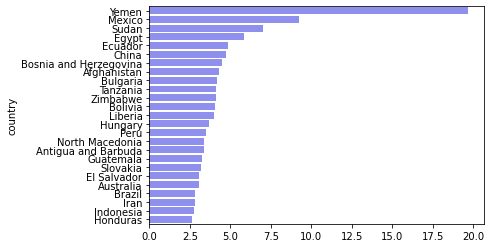

In [14]:
d = gdp_mundo_sorted.head(25)

Text(0.5, 1.0, 'gdp for lowest deaths ratio')

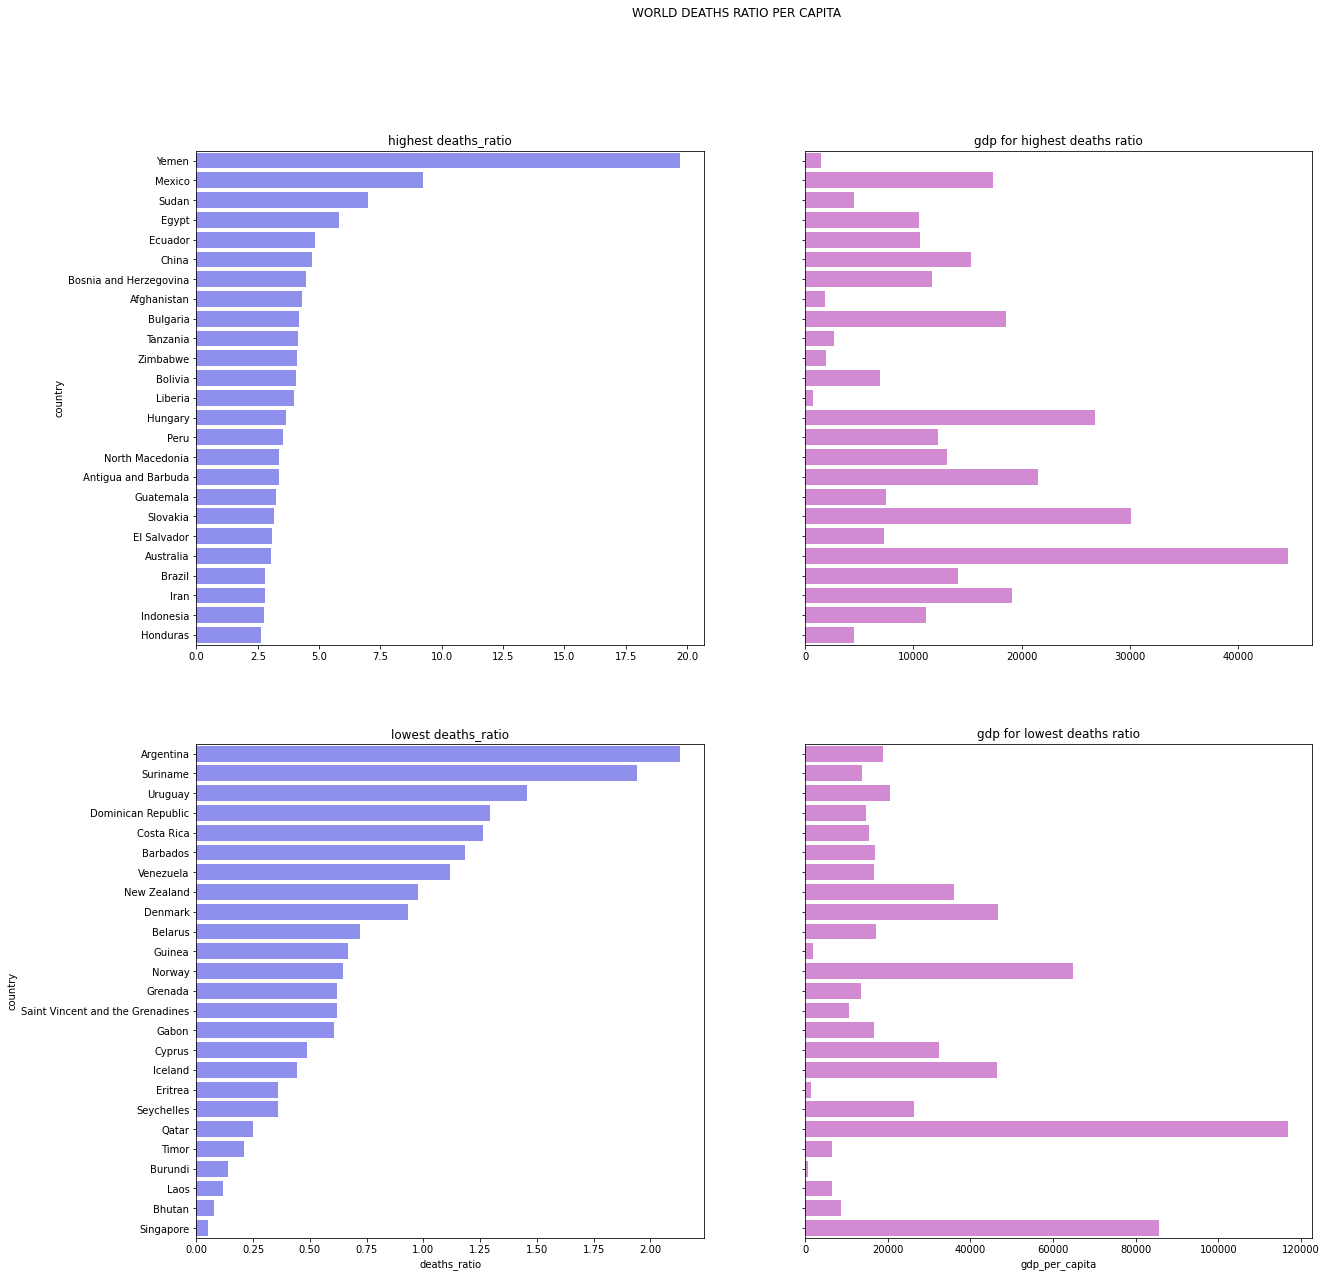

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('WORLD DEATHS RATIO PER CAPITA')

sns.barplot(ax=axes[0, 0], data=gdp_mundo_sorted.head(25), x='deaths_ratio', y='country', color="b", alpha=0.5).set(xlabel=None)

sns.barplot(ax=axes[0, 1], data=gdp_mundo_sorted.head(25), x='gdp_per_capita', y='country', color="m", alpha=0.5).set(xlabel=None, ylabel=None, yticklabels=[])

sns.barplot(ax=axes[1, 0], data=gdp_mundo_sorted.tail(25), x='deaths_ratio', y='country', color="b", alpha=0.5)

sns.barplot(ax=axes[1, 1], data=gdp_mundo_sorted.tail(25), x='gdp_per_capita', y='country', color="m", alpha=0.5).set(ylabel=None, yticklabels=[])

axes[0, 0].set_title("highest deaths_ratio")
axes[0, 1].set_title("gdp for highest deaths ratio")
axes[1, 0].set_title("lowest deaths_ratio")
axes[1, 1].set_title("gdp for lowest deaths ratio")